<a href="https://colab.research.google.com/github/vahid-nejad/stock_price_predication_with_LSTM./blob/main/stock_price_predication_with_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [167]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout
%matplotlib inline

In [168]:
data=pd.read_csv("/dataset_GE.csv", date_parser=True)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-07,6.06,6.26,6.06,6.11,6.080704,100663300
1,2020-05-08,6.21,6.33,6.16,6.29,6.259841,93637300
2,2020-05-11,6.24,6.25,6.13,6.19,6.160320,71843000
3,2020-05-12,6.22,6.28,6.00,6.00,5.971231,95652200
4,2020-05-13,6.00,6.02,5.48,5.79,5.762238,235745300


In [169]:
data_train = data[data['Date']<'2021-01-01'].copy()
data_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-05-07,6.06,6.26,6.06,6.11,6.080704,100663300
1,2020-05-08,6.21,6.33,6.16,6.29,6.259841,93637300
2,2020-05-11,6.24,6.25,6.13,6.19,6.160320,71843000
3,2020-05-12,6.22,6.28,6.00,6.00,5.971231,95652200
4,2020-05-13,6.00,6.02,5.48,5.79,5.762238,235745300
...,...,...,...,...,...,...,...
161,2020-12-24,10.85,10.85,10.62,10.65,10.642152,30049700
162,2020-12-28,10.70,10.78,10.58,10.64,10.632160,53796700
163,2020-12-29,10.66,10.77,10.54,10.56,10.552218,53035900
164,2020-12-30,10.58,10.85,10.55,10.71,10.702108,50621000


In [170]:
data_test = data[data['Date'] >= '2021-01-01'].copy()
data_test

,Date,Open,High,Low,Close,Adj Close,Volume
166,2021-01-04,10.89,10.90,10.40,10.47,10.462285,79949500
167,2021-01-05,10.43,10.88,10.42,10.77,10.762064,83700300
168,2021-01-06,10.83,11.62,10.83,11.36,11.351628,131584600
169,2021-01-07,11.56,11.57,11.24,11.27,11.261696,75289800
170,2021-01-08,11.29,11.44,11.16,11.34,11.331644,72719700
...,...,...,...,...,...,...,...
247,2021-04-30,13.16,13.35,13.08,13.12,13.120000,49863500
248,2021-05-03,13.24,13.53,13.17,13.45,13.450000,63472500
249,2021-05-04,13.34,13.39,13.07,13.12,13.120000,77538200
250,2021-05-05,13.16,13.29,13.16,13.21,13.210000,35448400


In [171]:
data_train = data_train.drop(['Date', 'Adj Close'], axis=1 )

data_train

,Open,High,Low,Close,Volume
0,6.06,6.26,6.06,6.11,100663300
1,6.21,6.33,6.16,6.29,93637300
2,6.24,6.25,6.13,6.19,71843000
3,6.22,6.28,6.00,6.00,95652200
4,6.00,6.02,5.48,5.79,235745300
...,...,...,...,...,...
161,10.85,10.85,10.62,10.65,30049700
162,10.70,10.78,10.58,10.64,53796700
163,10.66,10.77,10.54,10.56,53035900
164,10.58,10.85,10.55,10.71,50621000


In [172]:
scalar = MinMaxScaler()
scaled_training_data=scalar.fit_transform(data_train)
scaled_training_data

array([[0.07936508, 0.10291595, 0.10394265, 0.10508475, 0.30569902],
       [0.10582011, 0.11492281, 0.1218638 , 0.13559322, 0.2752822 ],
       [0.11111111, 0.10120069, 0.11648746, 0.11864407, 0.18093074],
       [0.10758377, 0.10634648, 0.09318996, 0.08644068, 0.28400506],
       [0.06878307, 0.06174957, 0.        , 0.05084746, 0.89049338],
       [0.00176367, 0.04116638, 0.        , 0.03559322, 0.47688391],
       [0.        , 0.        , 0.        , 0.        , 0.42614938],
       [0.02292769, 0.14236707, 0.04659498, 0.13220339, 0.97193868],
       [0.11992945, 0.12178388, 0.109319  , 0.1220339 , 0.339561  ],
       [0.12698413, 0.13893654, 0.14516129, 0.15762712, 0.26510906],
       [0.14285714, 0.15265866, 0.15232975, 0.16779661, 0.2977238 ],
       [0.15343915, 0.1406518 , 0.14157706, 0.1559322 , 0.17116064],
       [0.20811287, 0.21955403, 0.23476703, 0.2220339 , 0.43058462],
       [0.28924162, 0.30360206, 0.28853047, 0.30508475, 0.50954974],
       [0.33156966, 0.31389365, 0.

In [173]:
def perprocessData(training_data,n_back_steps):
    x_train, y_train = [], []
    for i in range(n_back_steps,training_data.shape[0]):
        x_train.append(training_data[i-n_back_steps : i])
        y_train.append(training_data[i,0])
    return np.array(x_train), np.array(y_train)


In [174]:
n_back_steps = 60
x_train, y_train = perprocessData(training_data, 60)

In [175]:
x_train.shape

(106, 60, 5)

In [176]:
y_train.shape

(106,)

#Building LSTM model

In [177]:
model = Sequential()
model.add(LSTM(units=50, return_sequences= True, activation="relu", input_shape= (x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation="relu", return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation="relu", return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation="relu"))
model.add(Dropout(0.5))

model.add(Dense(units=1))

model.summary()



Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_21 (LSTM)               (None, 60, 50)            11200     
_________________________________________________________________
dropout_21 (Dropout)         (None, 60, 50)            0         
_________________________________________________________________
lstm_22 (LSTM)               (None, 60, 60)            26640     
_________________________________________________________________
dropout_22 (Dropout)         (None, 60, 60)            0         
_________________________________________________________________
lstm_23 (LSTM)               (None, 60, 80)            45120     
_________________________________________________________________
dropout_23 (Dropout)         (None, 60, 80)            0         
_________________________________________________________________
lstm_24 (LSTM)               (None, 120)              

In [178]:
model.compile(optimizer="adam", loss="MSE")
history= model.fit(x_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
4/4 [==============================] - 5s 131ms/step - loss: 0.2888
Epoch 2/100
4/4 [==============================] - 1s 132ms/step - loss: 0.1754
Epoch 3/100
4/4 [==============================] - 1s 130ms/step - loss: 0.0724
Epoch 4/100
4/4 [==============================] - 1s 130ms/step - loss: 0.0589
Epoch 5/100
4/4 [==============================] - 1s 130ms/step - loss: 0.0602
Epoch 6/100
4/4 [==============================] - 1s 130ms/step - loss: 0.0398
Epoch 7/100
4/4 [==============================] - 1s 129ms/step - loss: 0.0539
Epoch 8/100
4/4 [==============================] - 1s 128ms/step - loss: 0.0318
Epoch 9/100
4/4 [==============================] - 1s 130ms/step - loss: 0.0375
Epoch 10/100
4/4 [==============================] - 1s 126ms/step - loss: 0.0412
Epoch 11/100
4/4 [==============================] - 1s 129ms/step - loss: 0.0349
Epoch 12/100
4/4 [==============================] - 1s 127ms/step - loss: 0.0332
Epoch 13/100
4/4 [===================

In [179]:
# plt.plot(history.history['loss'], label='Training loss')
# # plt.plot(history.history['val_loss'], label='Validation loss')
# plt.legend()


#Testing the model with test data

In [180]:
data_test= data_test.drop(['Date', 'Adj Close'], axis=1 )

In [181]:
scaled_test_data=scalar.transform(data_test)

In [182]:
x_test, y_test = perprocessData(training_data, n_back_steps)
x_test.shape , y_test.shape

((106, 60, 5), (106,))

In [183]:
y_pred= model.predict(x_test)
print(y_pred)

[[0.1507417 ]
 [0.14781132]
 [0.14511591]
 [0.1426319 ]
 [0.1404012 ]
 [0.13846043]
 [0.1366687 ]
 [0.13506868]
 [0.13367333]
 [0.13243598]
 [0.13139534]
 [0.13056177]
 [0.12989783]
 [0.12940373]
 [0.12901604]
 [0.12868562]
 [0.12836988]
 [0.12806803]
 [0.12779084]
 [0.1275267 ]
 [0.12727143]
 [0.12703986]
 [0.12681927]
 [0.1266117 ]
 [0.1264175 ]
 [0.12624598]
 [0.12610145]
 [0.12598868]
 [0.12589748]
 [0.12583092]
 [0.12578763]
 [0.1257597 ]
 [0.12576163]
 [0.12585165]
 [0.12614298]
 [0.12676683]
 [0.12790391]
 [0.12964246]
 [0.13196054]
 [0.13475464]
 [0.1379055 ]
 [0.14127396]
 [0.14473695]
 [0.14818051]
 [0.15150358]
 [0.15463114]
 [0.15752918]
 [0.16019224]
 [0.16260038]
 [0.165009  ]
 [0.16775751]
 [0.17103808]
 [0.17506981]
 [0.17992215]
 [0.18593846]
 [0.19360329]
 [0.20335956]
 [0.21542321]
 [0.23016825]
 [0.2477492 ]
 [0.26805624]
 [0.29028583]
 [0.31403157]
 [0.33878985]
 [0.36360076]
 [0.38791338]
 [0.411315  ]
 [0.43360624]
 [0.4548465 ]
 [0.47510642]
 [0.49566907]
 [0.51

rescale the data back to its original form

In [184]:
y_pred=y_pred*(1/scalar.scale_[0])
y_test=y_test* (1/scalar.scale_[0])
y_pred

array([[0.85470545],
       [0.83809024],
       [0.82280725],
       [0.8087229 ],
       [0.7960748 ],
       [0.78507066],
       [0.7749115 ],
       [0.76583946],
       [0.7579278 ],
       [0.750912  ],
       [0.74501157],
       [0.7402852 ],
       [0.7365207 ],
       [0.7337191 ],
       [0.73152095],
       [0.7296475 ],
       [0.72785723],
       [0.72614574],
       [0.7245741 ],
       [0.7230764 ],
       [0.721629  ],
       [0.72031605],
       [0.71906525],
       [0.7178883 ],
       [0.7167873 ],
       [0.7158147 ],
       [0.7149952 ],
       [0.7143558 ],
       [0.71383876],
       [0.71346134],
       [0.7132159 ],
       [0.7130575 ],
       [0.7130684 ],
       [0.7135788 ],
       [0.7152307 ],
       [0.71876794],
       [0.7252152 ],
       [0.73507273],
       [0.7482163 ],
       [0.7640588 ],
       [0.7819241 ],
       [0.80102336],
       [0.8206585 ],
       [0.84018356],
       [0.8590253 ],
       [0.8767586 ],
       [0.89319044],
       [0.908

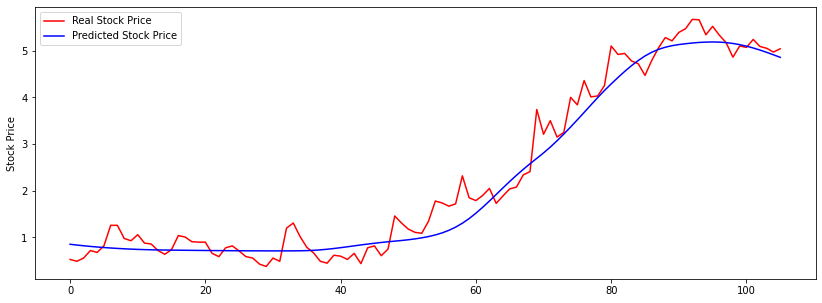

In [187]:
plt.figure(figsize=(14,5))
plt.plot(y_test, color="red" , label="Real Stock Price")
plt.plot(y_pred ,color="blue", label="Predicted Stock Price")


plt.ylabel("Stock Price")
plt.legend()
plt.show()